# Aula de classificação de fraude bancária

Link do dataset para consulta: https://www.kaggle.com/datasets/mishra5001/credit-card?resource=download

In [ ]:
# Bibliotecas para baixar o dataset, graficos e leitura do dataset
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [ ]:
link = 'https://drive.google.com/file/d/1UpKu9uQboBcT2b8ytOblzcK4SekLgYli/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('previous_application.csv') # Faz o download do arquivo
previous_application = pd.read_csv('previous_application.csv', nrows=100000) # Lê o arquivo. Apenas 100K registros 
previous_application.shape

(100000, 37)

In [ ]:
link = 'https://drive.google.com/file/d/12dOmc5_l2Vk0bNZ5tHk_88HqeGQ1tvqF/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('application_data.csv')
application_data = pd.read_csv('application_data.csv')
application_data.shape

(307511, 122)

In [ ]:
# Merge dos dois conjuntos de dados 
# Usamos how=inner pois usamos apenas parte dos dados de previus application
df = application_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
df.shape

(84752, 158)

#### Análise Exploratória

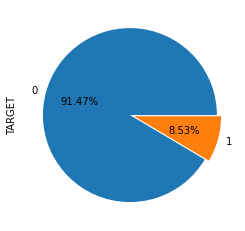

In [ ]:
df['TARGET'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


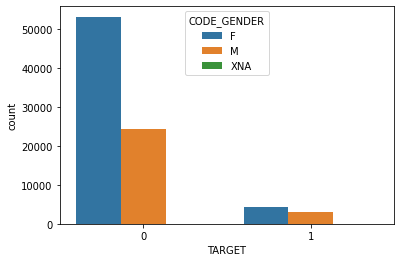

In [ ]:
sns.countplot('TARGET', hue='CODE_GENDER', data=df)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

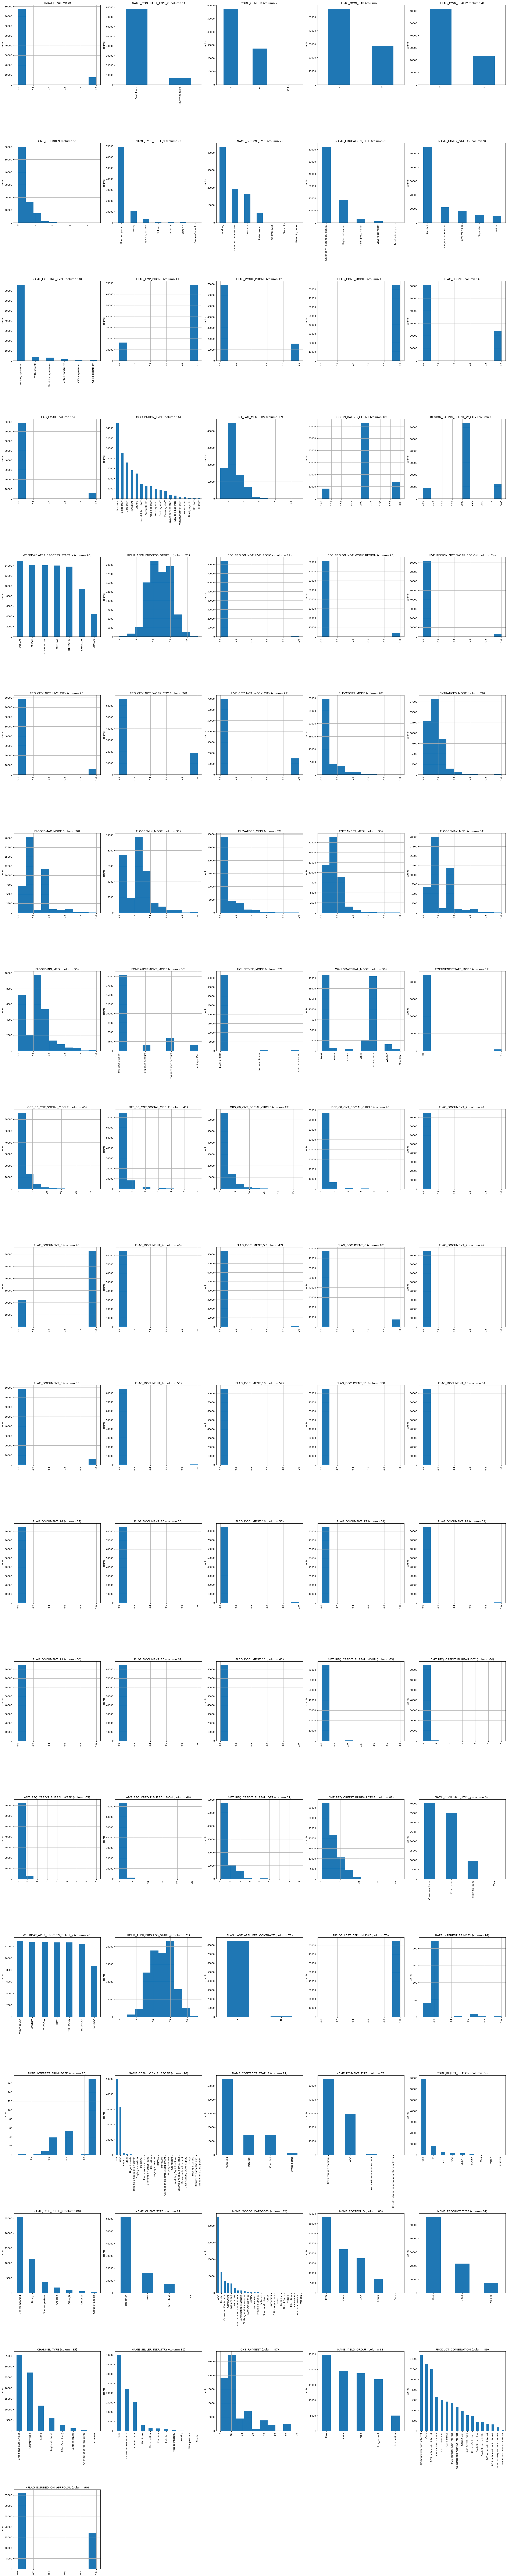

In [ ]:
plotPerColumnDistribution(df, 100, 5)

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de correlação ', fontsize=15)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


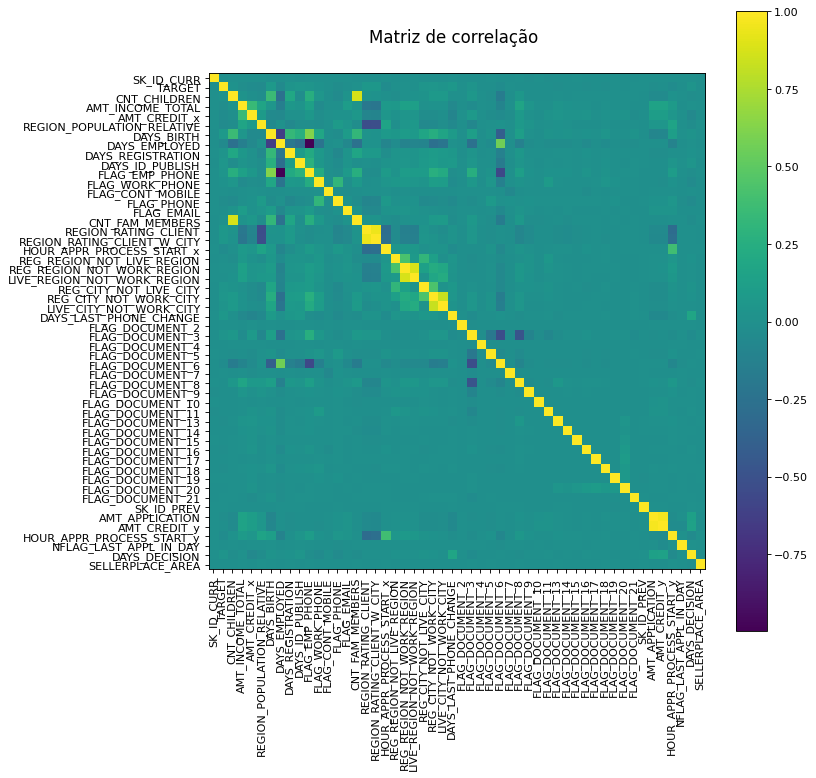

In [ ]:
plotCorrelationMatrix(df, 10)

In [ ]:
objlist = df.select_dtypes(include='object').columns
print(objlist)

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')


In [ ]:
for i in objlist:
  print('A variável {} possui {} registros únicos.'.format(str(i), df[i].nunique()))

A variável NAME_CONTRACT_TYPE_x possui 2 registros únicos.
A variável CODE_GENDER possui 3 registros únicos.
A variável FLAG_OWN_CAR possui 2 registros únicos.
A variável FLAG_OWN_REALTY possui 2 registros únicos.
A variável NAME_TYPE_SUITE_x possui 7 registros únicos.
A variável NAME_INCOME_TYPE possui 7 registros únicos.
A variável NAME_EDUCATION_TYPE possui 5 registros únicos.
A variável NAME_FAMILY_STATUS possui 5 registros únicos.
A variável NAME_HOUSING_TYPE possui 6 registros únicos.
A variável OCCUPATION_TYPE possui 18 registros únicos.
A variável WEEKDAY_APPR_PROCESS_START_x possui 7 registros únicos.
A variável ORGANIZATION_TYPE possui 58 registros únicos.
A variável FONDKAPREMONT_MODE possui 4 registros únicos.
A variável HOUSETYPE_MODE possui 3 registros únicos.
A variável WALLSMATERIAL_MODE possui 7 registros únicos.
A variável EMERGENCYSTATE_MODE possui 2 registros únicos.
A variável NAME_CONTRACT_TYPE_y possui 4 registros únicos.
A variável WEEKDAY_APPR_PROCESS_START_y p

In [ ]:
# Checa dados faltantes
dados_faltando_perc = df.isna().sum()*100/len(df)
dados_faltando_perc_colunas = dados_faltando_perc[dados_faltando_perc>=20]
dados_faltando_perc_colunas.count()

64

In [ ]:
# Filtra colunas com mais de 20% de dados faltando
filtered_df = df.drop(columns=dados_faltando_perc_colunas.index)

In [ ]:
# Fillna preenche dados faltantes, backfill pega o valor anterior ao faltante, ffill pega o valor a frente
filtered_df = filtered_df.fillna(method='backfill')

In [ ]:
filtered_df.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

##### Modelos de Machine Learning

In [ ]:
# Bibliotecas para o modelo e feature engineering

from sklearn import preprocessing # POssui funções para fazer transformação nos dados

from sklearn.model_selection import train_test_split # Divisão do dataset em treino e teste 

# Medidas de avaliação dos modelos 
from sklearn.metrics import confusion_matrix # Matriz de confusão 
from sklearn.metrics import (roc_curve, 
                             recall_score,
                             accuracy_score,
                             roc_auc_score,
                             precision_score,
                             f1_score) 

from sklearn.model_selection import KFold # Validação cruzada 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Otimização dos hiperparametros

# Algoritmos de classificação
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [ ]:
# Lista de colunas categoricas para transformação
cat_cols = filtered_df.select_dtypes(include='object').columns

In [ ]:
# Faz transformação de colunas categóricas, atribuindo um valor a cada categoria (0,1,2,3,4,5,6...)
le = preprocessing.LabelEncoder() 

In [ ]:
for c in cat_cols: # Looping para pegar cada coluna do cat_cols
  filtered_df[c] = le.fit_transform(filtered_df[c]) # aplica o LabelEncoder(le) na coluna que esta no looping

In [ ]:
filtered_df.sample(3) # Checando se a transformação foi bem sucedida

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
35164,248462,0,0,1,1,1,3,112500.0,99000.0,7659.0,99000.0,1,6,4,1,1,0.028663,-14726,-2819,-2921.0,-4810,1,1,0,1,0,1,5.0,2,2,0,9,0,0,0,0,1,1,4,0.616074,0.595456,3.0,0.0,3.0,0.0,-91.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0,1358852,0,810000.0,810000.0,0,11,1,1,24,0,-91,0,7,2,25,2,2,5,-1,10,3,7
59005,348829,0,0,1,0,1,0,157500.0,514602.0,52861.5,495000.0,3,6,4,1,1,0.025164,-16634,-1811,-4075.0,-19,1,1,0,1,0,0,2.0,2,2,2,13,0,0,0,0,0,0,33,0.306255,0.465069,0.0,0.0,0.0,0.0,-967.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1551488,1,15948.0,16803.0,2,10,1,1,23,0,-1778,0,7,2,6,3,0,7,150,4,4,9
4274,118620,0,0,1,1,1,1,180000.0,807984.0,29151.0,697500.0,1,6,4,1,1,0.028663,-16257,-1767,-1349.0,-4105,1,1,0,1,0,0,3.0,2,2,3,12,0,0,0,0,0,0,5,0.559537,0.239226,0.0,0.0,0.0,0.0,-909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1223967,1,58455.0,54342.0,1,13,1,1,23,2,-2743,0,3,2,25,3,0,4,2222,4,1,9


In [ ]:
filtered_df.set_index('SK_ID_CURR') # Define a variável SK_ID_CURR como indice do dataset

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,6,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.492060,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2078043,0,675000.0,675000.0,4,15,1,1,24,0,-181,0,7,2,25,2,2,5,-1,10,3,7
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,6,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.492060,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2001242,0,180000.0,180000.0,3,14,1,1,24,0,-865,0,7,2,25,2,1,6,1200,4,1,3
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,6,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.492060,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2730157,0,225000.0,284400.0,0,13,1,1,24,0,-867,0,7,2,25,2,2,0,4,10,4,8
100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,6,0,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,1413109,1,98239.5,98239.5,2,18,1,1,23,0,-449,0,7,2,6,3,0,6,164,4,2,10
100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,405000.0,6,6,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,0.542445,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,2243829,1,18720.0,23697.0,4,9,1,1,23,0,-1673,3,7,0,1,3,0,4,42,2,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456230,0,0,0,1,1,1,292500.0,355536.0,18283.5,270000.0,6,0,1,0,1,0.072508,-16010,-1185,-5034.0,-4392,1,1,0,1,1,0,3.0,1,1,2,17,0,0,0,0,0,0,4,0.661025,0.199771,0.0,0.0,0.0,0.0,0.0,0,0,0,0

In [ ]:
# Define variáveis independentes e dependente
X = filtered_df.drop('TARGET', axis=1) # Filtra variaveis independentes (axis=1 é coluna e axis=0 é linha)
y = filtered_df['TARGET'] # Filtra somente a variável dependente

In [ ]:
# Separa X e y em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # Separa entre treino e teste com 30% de dados de teste

In [ ]:
# função auxiliar para treinamento, predição, avaliação e features mais importantes dos modelos 
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [ ]:
# Dicionário com alguns modelos para treinamento
modelos = [
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier},
           {'nome': 'logreg',
            'modelo': LogisticRegression}
          ]